<h1 style="text-align: center;">TF2202 Komputasi Rekayasa</h1>
<h2 style="text-align: center;">Latihan Python</h2>

# Setup

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use("default")

In [4]:
import IPython.display
IPython.display.set_matplotlib_formats("svg")

# Operasi matematika

Lakukan operasi berikut ini dengan menggunakan Python.

$3^4$

In [1]:
3**4

81

$\displaystyle \sqrt{\frac{10}{11}}$

In [5]:
(10/11)**0.5

0.9534625892455924

In [6]:
import math
math.sqrt(10/11)

0.9534625892455924

$\displaystyle \sin\left(\frac{\pi}{5}\right) + \sin\left(\frac{\pi}{8}\right)$

In [7]:
math.sin(math.pi/5) + math.sin(math.pi/8)

0.970468684657563

$\exp\left(\dfrac{2}{7}\right)$

In [8]:
math.exp(2/7)

1.33071219744735

$(1 + 2\imath)(3 + 5\imath)$ di mana $\imath=\sqrt{-1}$ adalah bilangan imajiner.

In [9]:
(1 + 2j)*(3 + 5j)

(-7+11j)

$\displaystyle \exp\left(\frac{\imath}{3}\right)$ dengan $\imath=\sqrt{-1}$

In [10]:
import cmath
cmath.exp(1j/3)

(0.9449569463147377+0.3271946967961522j)

$10!$

In [11]:
math.factorial(10)

3628800

$$
\sum_{n=0}^{10} \dfrac{2}{n!}
$$

In [15]:
ss = 0.0
for n in range(10+1):
    ss = ss + 2/math.factorial(n)
ss

5.436563602292769

$$
\prod_{n=1}^{5} \frac{1}{n!}
$$

In [18]:
pp = 1.0
for n in range(1,3+1):
    pp = pp*(1/math.factorial(n))
pp

0.08333333333333333

# Numpy

Deret Fourier

# Plot 2d

Plot sin dan cos dalam satu figure

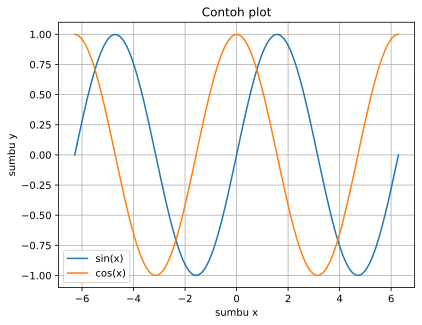

In [30]:
plt.clf()
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x, np.sin(x), label="sin(x)")
plt.plot(x, np.cos(x), label="cos(x)")
plt.title("Contoh plot")
plt.grid()
plt.xlabel("sumbu x")
plt.ylabel("sumbu y")
plt.legend();

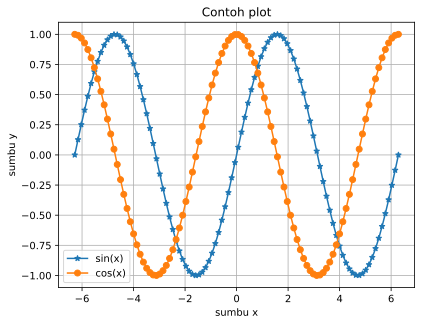

In [31]:
plt.clf()
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x, np.sin(x), label="sin(x)", marker="*")
plt.plot(x, np.cos(x), label="cos(x)", marker="o")
plt.title("Contoh plot")
plt.grid()
plt.xlabel("sumbu x")
plt.ylabel("sumbu y")
plt.legend();

<Figure size 640x480 with 0 Axes>

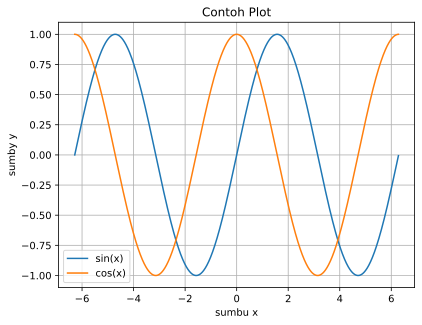

In [27]:
plt.clf()
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y1 = np.sin(x)
y2 = np.cos(x)
fig, ax = plt.subplots();
ax.plot(x, y1, label="sin(x)");
ax.plot(x, y2, label="cos(x)");
ax.set(xlabel="sumbu x", ylabel="sumby y", title="Contoh Plot");
ax.grid();
ax.legend();

## Plot fungsi sinc

Plot fungsi berikut ini pada selang $[-5,5]$:

$$
f(x) = \frac{\sin(\pi x)}{\pi x}
$$

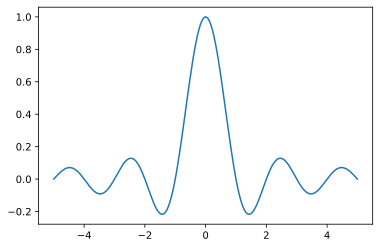

In [21]:
plt.clf()
x = np.linspace(-5.0, 5.0, 200)
y = np.sin(np.pi*x)/(np.pi*x)
plt.plot(x, y);

## Plot fungsi Gaussian

Plot Gaussian:

$$
g(x) = \frac{1}{\sigma\sqrt{2\pi}}
\exp\left[-\frac{1}{2}\left( \frac{x - \mu}{\sigma} \right)^2 \right]
$$

pada selang $[-5,5]$ dengan parameter-parameter berikut:

- $\mu = 0$, $\sigma=1.0$
- $\mu = 1.0$, $\sigma=0.5$
- $\mu = -2.0$, $\sigma=0.25$

In [40]:
def gaussian(x, μ, σ):
    NN = σ * np.sqrt(2*np.pi)
    return np.exp(-0.5*((x-μ)/σ)**2)/NN

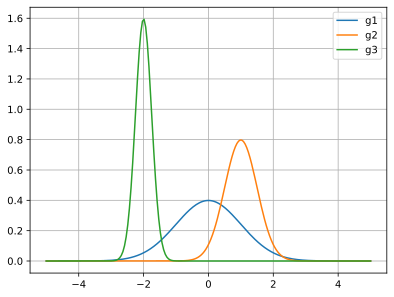

In [45]:
plt.clf()
x = np.linspace(-5,5,200)
plt.plot(x, gaussian(x, 0.0, 1.0), label="g1");
plt.plot(x, gaussian(x, 1.0, 0.5), label="g2");
plt.plot(x, gaussian(x, -2.0, 0.25), label="g3")
plt.legend()
plt.grid();

# Deret Fourier

## Gelombang kotak

$$
x(t) = \frac{4}{\pi} \sum_{k=1}^{\infty}
\frac{\sin\left( 2\pi (2k-1) f t \right)}{2k - 1}
$$

## Kode

In [47]:
def gelombang_kotak(t, f, kmax):
    xt = 0.0
    for k in range(1,kmax+1):
        ss = np.sin( 2*np.pi*(2*k - 1)*f*t )/(2*k - 1)
        xt = xt + ss
    return 4*xt/np.pi

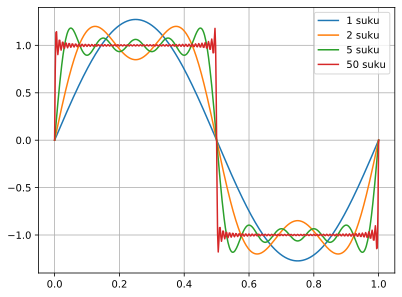

In [60]:
f = 1.0
t = np.linspace(0.0, 1.0, 500)
x1 = gelombang_kotak(t, f, 1)
x2 = gelombang_kotak(t, f, 2)
x5 = gelombang_kotak(t, f, 5)
plt.clf()
plt.plot(t, x1, label="1 suku")
plt.plot(t, x2, label="2 suku")
plt.plot(t, x5, label="5 suku")
plt.plot(t, gelombang_kotak(t, f, 50), label="50 suku")
plt.grid()
plt.legend();

## Gelombang segitiga

$$
x(t) = \frac{8}{\pi^2} \sum_{k=0}^{\infty}
(-1)^{k} \frac{\sin(2\pi (2k + 1) f t)}{(2k + 1)^{2}}
$$

## Kode

In [80]:
def gelombang_segitiga(t, f, kmax):
    xt = 0.0
    for k in range(kmax):
        n = 2*k + 1
        ss = (-1.0)**k * np.sin(2*np.pi*n*f*t)/n**2
        xt = xt + ss
    return 8*xt/np.pi**2

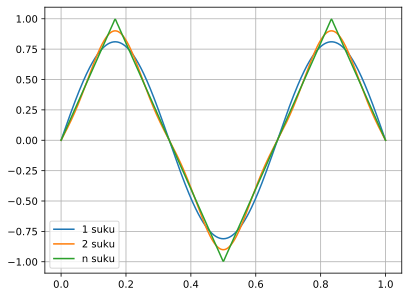

In [81]:
f = 1.5
t = np.linspace(0.0, 1.0, 500)
x1 = gelombang_segitiga(t, f, 1)
x2 = gelombang_segitiga(t, f, 2)
plt.clf()
plt.plot(t, x1, label="1 suku")
plt.plot(t, x2, label="2 suku")
plt.plot(t, gelombang_segitiga(t, f, 50), label="n suku")
plt.grid()
plt.legend();

## Gelombang gergaji

$$
x_{\mathrm{sawtooth}}(t) = \frac{1}{2} - \frac{1}{\pi} \sum_{k=1}^{\infty}
(-1)^{k} \frac{\sin(2\pi k f t)}{k}
$$

$$
x_{\mathrm{reverse-sawtooth}}(t) = \frac{2}{\pi} \sum_{k=1}^{\infty}
(-1)^{k} \frac{\sin(2\pi k f t)}{k}
$$

## Kode

In [87]:
def gelombang_gergaji(t, f, kmax):
    xt = 0.0
    for k in range(1,kmax+1):
        ss = (-1.0)**k * np.sin(2*np.pi*k*f*t)/k
        xt = xt + ss
    return 0.5 - xt/np.pi

In [88]:
def gelombang_gergaji_reverse(t, f, kmax):
    xt = 0.0
    for k in range(1,kmax+1):
        ss = (-1.0)**k * np.sin(2*np.pi*k*f*t)/k
        xt = xt + ss
    return 2*xt/np.pi

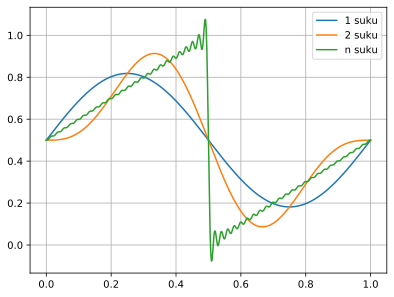

In [89]:
f = 1.0
t = np.linspace(0.0, 1.0, 500)
x1 = gelombang_gergaji(t, f, 1)
x2 = gelombang_gergaji(t, f, 2)
plt.clf()
plt.plot(t, x1, label="1 suku")
plt.plot(t, x2, label="2 suku")
plt.plot(t, gelombang_gergaji(t, f, 50), label="n suku")
plt.grid()
plt.legend();

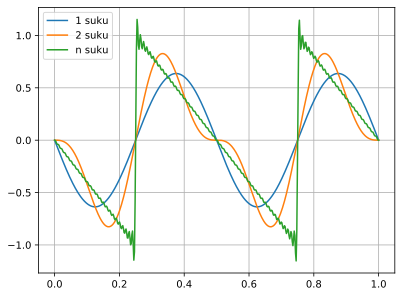

In [91]:
f = 2.0
t = np.linspace(0.0, 1.0, 500)
x1 = gelombang_gergaji_reverse(t, f, 1)
x2 = gelombang_gergaji_reverse(t, f, 2)
plt.clf()
plt.plot(t, x1, label="1 suku")
plt.plot(t, x2, label="2 suku")
plt.plot(t, gelombang_gergaji_reverse(t, f, 50), label="n suku")
plt.grid()
plt.legend();

Gelombang berjalan

$$
y(t) = A\cos(\omega t - kx)
$$

$$
\omega = 2\pi f \\
k = \frac{2\pi}{\lambda}
$$

In [99]:
def travel_wave(x, t, A, k, ω):
    return A*np.cos(ω*t - k*x)

In [109]:
def travel_wave_sin(x, t, A, k, ω):
    return A*np.sin(ω*t - k*x)

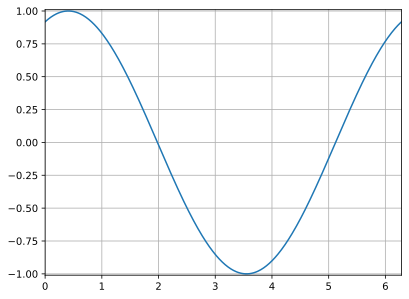

In [110]:
xmin = 0.0
xmax = 2*np.pi
x = np.linspace(xmin, xmax, 500)
ω = 2.0
A = 1.0
k = 1.0

dt = 0.01
t0 = 0.0
for i in range(100):
    t = t0 + i*dt
    y = travel_wave_sin(x, t, A, k, ω)
    plt.clf()
    plt.plot(x, y)
    plt.xlim(xmin, xmax)
    plt.ylim(-A-0.01, A+0.01)
    plt.grid()
    filename = "IMG_{:04d}_wave.png".format(i)
    plt.savefig(filename, dpi=150)

In [9]:
def gelombang_gergaji_travel(x, t, ω, fx, kmax):
    yt = 0.0
    for k in range(1,kmax+1):
        kx = 2*np.pi*k
        ss = (-1.0)**k * np.sin(kx*x - ω*t)/k
        yt = yt + ss
    return (0.5 - yt/np.pi)

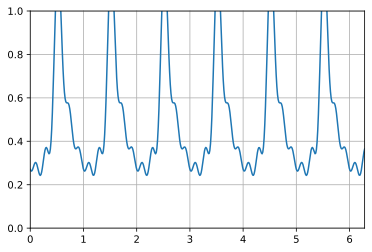

In [10]:
xmin = 0.0
xmax = 2*np.pi
x = np.linspace(xmin, xmax, 500)
ω = 2.0
A = 1.0
k = 1.0

dt = 0.01
t0 = 0.0
fx = 0.25
kmax = 5
for i in range(100):
    t = t0 + i*dt
    y = gelombang_gergaji_travel(x, t, ω, fx, kmax)
    plt.clf()
    plt.plot(x, y)
    plt.xlim(xmin, xmax)
    plt.ylim(0.0, 1.0)
    plt.grid()
    filename = "IMG_gergaji_{:04d}.png".format(i)
    plt.savefig(filename, dpi=150)